# Group 22 Project Proposal

## Gender Wage Disparities in the United States: A Comparative Analysis

### Table of Contents

- [Introduction](#Introduction)
- [Preliminary Results](#Preliminary-Results)
    - [Data wrangling](#Data-wrangling)
    - [Plotting of relevant variables](#Plotting-of-relevant-variables)
- [Methods](#Methods)
    - [Trustworthiness of Report](#Trustworthiness-of-Report)
    - [Methods (PLAN)](#Methods-(PLAN))
    - [Reflecting on how the final report might play out](#Reflecting-on-how-the-final-report-might-play-out)
- [References](#References)

# Introduction

The proposed project aims to investigate gender wage disparities in the United States using a dataset containing information on various demographic and employment-related variables. The primary question we seek to answer is whether there is a significant difference in wages between male and female workers. We will focus on the hourly wage as our main variable of interest to compare across the two genders. By analyzing this dataset, we aim to shed light on existing gender wage gaps and assess the potential impact of such disparities.

# Preliminary Results

## Data wrangling

In [1]:
library(infer)
library(repr)
library(readr)
library(tidyverse)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.4.1 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Importing necessary R packages for statistical analysis, data visualization, and data manipulation.

In [2]:
raw_data <- read_csv('https://github.com/AVietCong/stat201-group22-project/raw/main/Gender_Pay_Gap_dataset.csv')
head(raw_data)

Rows: 53790 Columns: 129
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): adj_occ2name
dbl (127): year, serial, numprec, gq, region, statefip, metro, metarea, coun...
lgl   (1): farm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,serial,numprec,gq,region,statefip,metro,metarea,county,farm,⋯,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,4484,1,1,11,50,1,NA,NA,NA,⋯,0,0,0,0,0,0,0,0,1,1
2013,21761,3,1,21,39,3,2002,NA,NA,⋯,0,0,0,0,0,1,0,0,1,1
2013,7174,4,1,11,44,2,6483,NA,NA,⋯,0,0,0,0,0,0,0,0,1,1
2013,58428,1,1,31,12,3,4901,12009,NA,⋯,0,0,0,0,0,0,0,0,1,1
2013,2894,3,1,11,33,1,NA,NA,NA,⋯,0,0,0,0,0,0,0,1,1,1
2013,56021,1,1,31,12,4,2900,12001,NA,⋯,0,0,0,0,0,1,0,0,1,1


We have successfully imported and cleaned the dataset, ensuring that the data is in a tidy format for analysis. We have also plotted the raw data, specifically examining the distribution of hourly wages for male and female workers. In the preliminary analysis, we observed that there is a clear difference in the distribution of hourly wages between males and females.

The dataset we will be using comprises information on a sample of individuals from the United States, including variables such as sex, race, hourly wage (hrwage), total income (incwage), years of schooling (sch), weeks worked in a year (wkswork1), usual hours worked per week (uhrswork), and other relevant factors. For our analysis, we have narrowed down the dataset to focus only on the variables of interest, namely sex, race, hourly wage, total income, schooling years, weeks worked, and usual hours worked.

In [3]:
raw_data$industry <- colnames(raw_data[,89:127])[apply(raw_data[,89:127], 1, which.max)]
head(raw_data)

year,serial,numprec,gq,region,statefip,metro,metarea,county,farm,⋯,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS,industry
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2013,4484,1,1,11,50,1,NA,NA,NA,⋯,0,0,0,0,0,0,0,1,1,Medical
2013,21761,3,1,21,39,3,2002,NA,NA,⋯,0,0,0,0,1,0,0,1,1,publicadmin
2013,7174,4,1,11,44,2,6483,NA,NA,⋯,0,0,0,0,0,0,0,1,1,professional
2013,58428,1,1,31,12,3,4901,12009,NA,⋯,0,0,0,0,0,0,0,1,1,finance
2013,2894,3,1,11,33,1,NA,NA,NA,⋯,0,0,0,0,0,0,1,1,1,miningconstruction
2013,56021,1,1,31,12,4,2900,12001,NA,⋯,0,0,0,0,1,0,0,1,1,miningconstruction


Creating a new column "industry" in the raw data, containing the names of industries based on maximum values.

In [4]:
filtered_data <- select(raw_data, sex, race, hrwage, incwage, sch, wkswork1, uhrswork, potexp, industry) %>%
    mutate(sex = as.factor(sex),
           race = as.factor(race),
           hrwage = as.double(hrwage),
           incwage = as.double(incwage),
           sch = as.double(sch),
           wkswork = as.integer(wkswork1),
           uhrswork = as.integer(uhrswork),
           potexp = as.integer(potexp),
            industry = as.character(industry))
head(filtered_data)

sex,race,hrwage,incwage,sch,wkswork1,uhrswork,potexp,industry,wkswork
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>
1,1,24.91259,57000,14,52,44,42,Medical,52
1,1,31.00000,62000,13,50,40,40,publicadmin,50
1,3,21.63461,45000,12,52,40,26,professional,52
1,1,12.82051,28000,12,52,42,23,finance,52
1,1,21.25000,42500,12,50,40,17,miningconstruction,50
1,1,21.87500,35000,11,40,40,18,miningconstruction,40


The code above filters and selects specific variables from the raw data, converts them to appropriate data types, and displays the first few rows.

In [5]:
pay_data <- filtered_data %>%
    mutate(sex = fct_recode(sex, 'male' = '1', 'female' = '2'),
           race = fct_recode(race, 'White' = '1', 'Black' = '2', 'Hispanic' = '3', 'Other' = '4'),
           education_level = case_when(sch == 0 ~ 'None',
                                       sch < 12 ~ 'Incomplete Schooling', 
                                       sch == 12 ~ 'Highschool',
                                       sch == 13 ~ 'College',
                                       sch == 14 ~ 'Associate Degree',
                                       sch <= 16 ~ 'BA',
                                       sch <= 18 ~ 'Advanced Degree'))
head(pay_data)

sex,race,hrwage,incwage,sch,wkswork1,uhrswork,potexp,industry,wkswork,education_level
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<chr>
male,White,24.91259,57000,14,52,44,42,Medical,52,Associate Degree
male,White,31.00000,62000,13,50,40,40,publicadmin,50,College
male,Hispanic,21.63461,45000,12,52,40,26,professional,52,Highschool
male,White,12.82051,28000,12,52,42,23,finance,52,Highschool
male,White,21.25000,42500,12,50,40,17,miningconstruction,50,Highschool
male,White,21.87500,35000,11,40,40,18,miningconstruction,40,Incomplete Schooling


Filtering and recoding data in the 'pay_data' table, assigning labels to 'sex', 'race', and 'education_level' variables. It then displays the first rows.

## Plotting of relevant variables

Total Counts of Male and Female

In [6]:
sex_summary <- pay_data |>
    group_by(sex) |>
    summarise(count = n())
sex_summary

sex,count
<fct>,<int>
male,27225
female,26565


The code creates a summary table (sex_summary) showing the count of observations for each gender (male and female) in the pay_data.

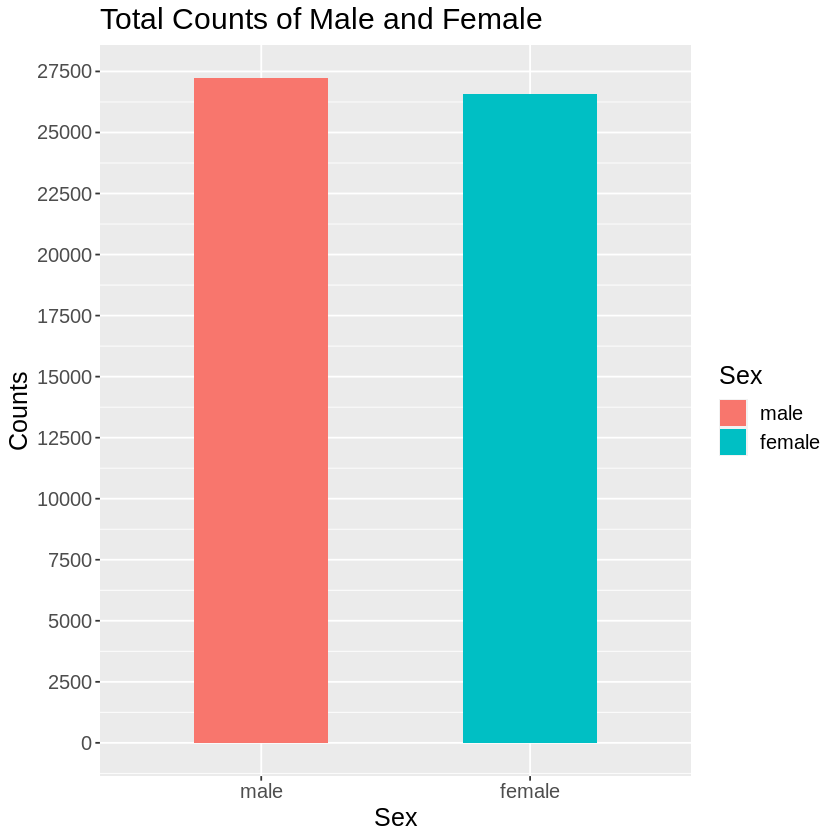

In [7]:
sex_plot <- sex_summary |>
    ggplot(aes(x = sex, y = count, fill = sex)) +
    geom_bar(stat = "identity", width = 0.5) +
    scale_y_continuous(breaks=seq(0, 27500, by = 2500)) +
    labs(x = "Sex", y = "Counts", fill = "Sex") +
    theme(text = element_text(size = 15)) +
    ggtitle("Total Counts of Male and Female")
    
sex_plot

This code creates a bar plot (sex_plot) visualizing the total counts of males and females using ggplot2 in R.

### Average Potential Experience of Man and Woman

In [8]:
avg_potexp_summary <- pay_data %>%
    group_by(sex) %>%
    summarise(avg_potexp = mean(potexp))
avg_potexp_summary

sex,avg_potexp
<fct>,<dbl>
male,22.64522
female,22.77030


The code above calculates the average potential experience (potexp) for each gender (sex) in the dataset (pay_data).

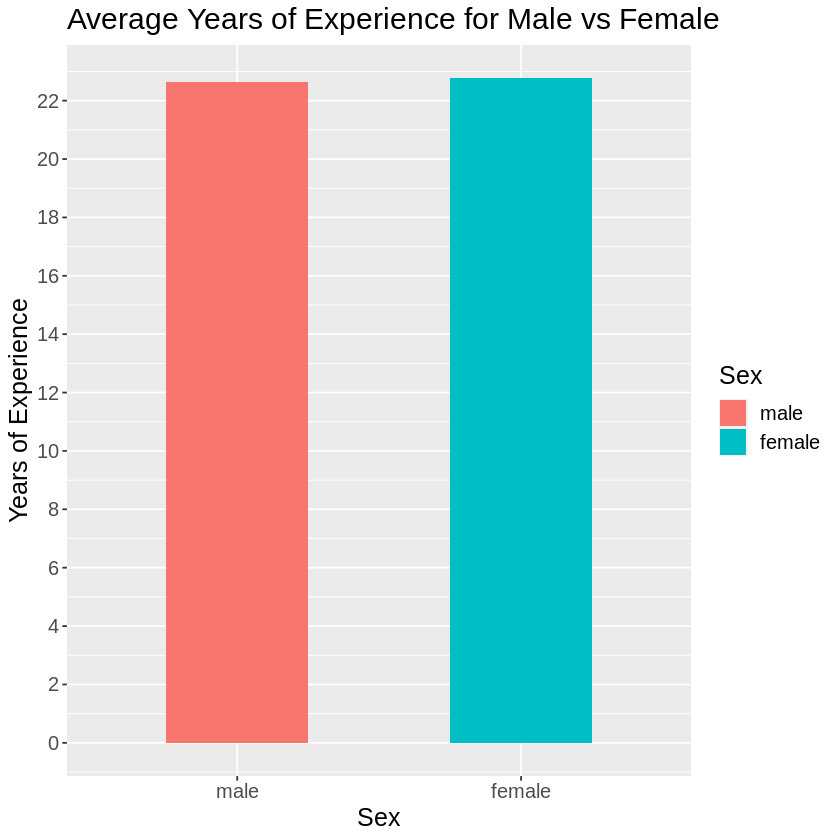

In [9]:
avg_potexp_plot <- ggplot(avg_potexp_summary, aes(x = sex, y = avg_potexp, fill = sex)) + 
    geom_bar(stat = 'identity', width = 0.5) + 
    scale_y_continuous(breaks=seq(0, 25, by = 2)) +
    labs(x = 'Sex', y = 'Years of Experience', title = 'Average Years of Experience for Male vs Female', fill = "Sex") +
    theme(text = element_text(size = 15))

avg_potexp_plot

The code above creates a bar plot using ggplot2, comparing the average years of experience between male and female workers.

### Education Level

In [10]:
education_level_summary <- pay_data %>%
    group_by(sex) %>%
    summarise(none = mean(education_level == 'None') * 100,
              incomplete = mean(education_level == 'Incomplete Schooling') * 100,
              highschool = mean(education_level == 'Highschool') * 100,
              college = mean(education_level == 'College') * 100,
              associate = mean(education_level == 'Associate Degree') * 100,
              ba = mean(education_level == 'BA') * 100,
              postsec = mean(education_level == 'Advanced Degree') * 100)
education_level_summary

sex,none,incomplete,highschool,college,associate,ba,postsec
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
male,0.2754821,7.911846,29.18274,16.60606,10.43159,22.69238,12.89991
female,0.1392810,5.010352,24.25748,16.79277,13.41991,25.31526,15.06494


Calculating the percentage distribution of education levels for each gender in the dataset "pay_data" and summarizes the results.

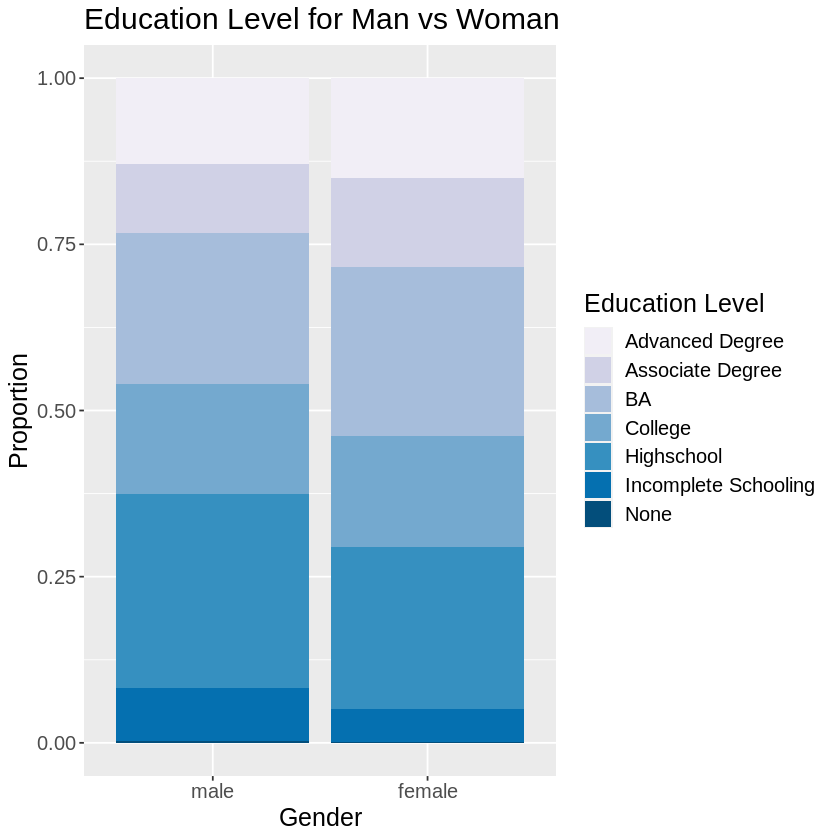

In [11]:
schooling_plot <- ggplot(pay_data, aes(x = sex, fill = factor(education_level))) + 
    geom_bar(position = 'fill') + 
    labs(x = 'Gender', y = 'Proportion', title = 'Education Level for Man vs Woman', fill = 'Education Level') +
    theme(text = element_text(size = 15)) +
    scale_fill_brewer(palette = 'PuBu')

schooling_plot

Generation of a stacked bar plot using ggplot2, comparing the education level proportions between men and women.

In [12]:
avg_hrs_summary <- pay_data |>
    group_by(sex) |>
    summarise(avg_hrs = mean(uhrswork))
avg_hrs_summary

sex,avg_hrs
<fct>,<dbl>
male,42.88779
female,38.14896


The code above calculates the average weekly working hours (uhrswork) for each sex (male and female) in the pay_data dataset.

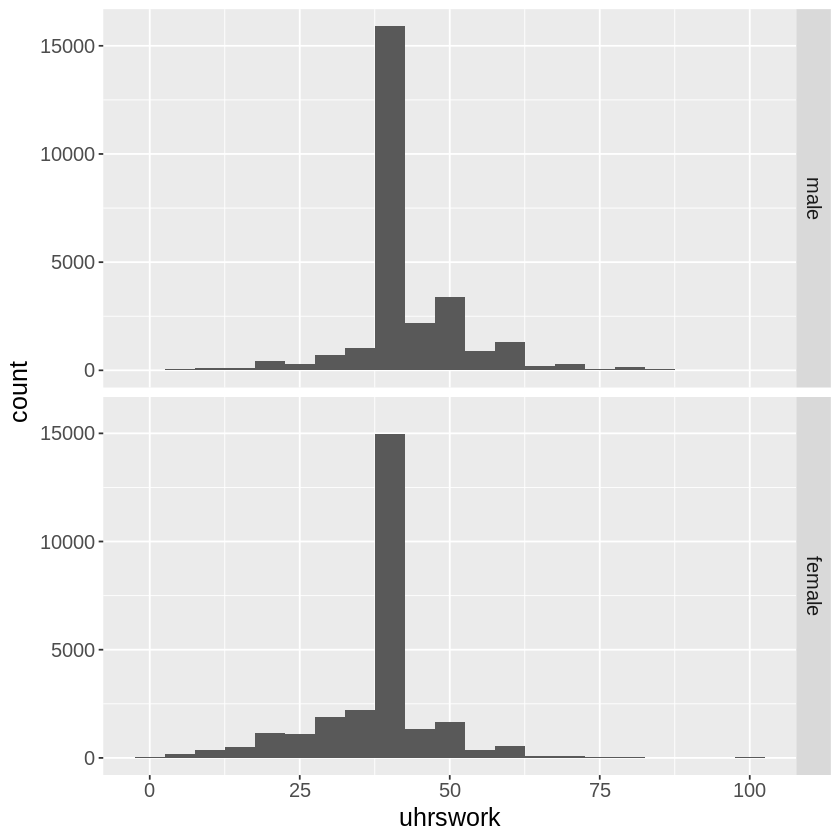

In [13]:
# pay_data_male <- pay_data |>
#     filter(sex == "male")

# pay_data_female <- pay_data |>
#     filter(sex == "female")

# avg_hrs_plot_m <- pay_data_male |>
#     ggplot(aes(x = uhrswork)) +
#     geom_histogram(binwidth = 5, fill = "cornflowerblue")

# avg_hrs_plot_f <- pay_data_female |>
#     ggplot(aes(x = uhrswork)) +
#     geom_histogram(binwidth = 5, fill = "coral")

# avg_hrs_plots <- plot_grid(avg_hrs_plot_m, avg_hrs_plot_f) +
#     theme(text = element_text(size = 15))
# avg_hrs_plots

avg_hrs_plot <- pay_data |>
    ggplot(aes(x = uhrswork), fill = as.factor(sex)) +
    geom_histogram(binwidth = 5) +
    facet_grid(vars(sex)) +
    theme(text = element_text(size = 15))
avg_hrs_plot

This code creates a histogram to visualize average weekly working hours (uhrswork) for each gender (sex) using ggplot in R.

Warning message:
“Removed 1186 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


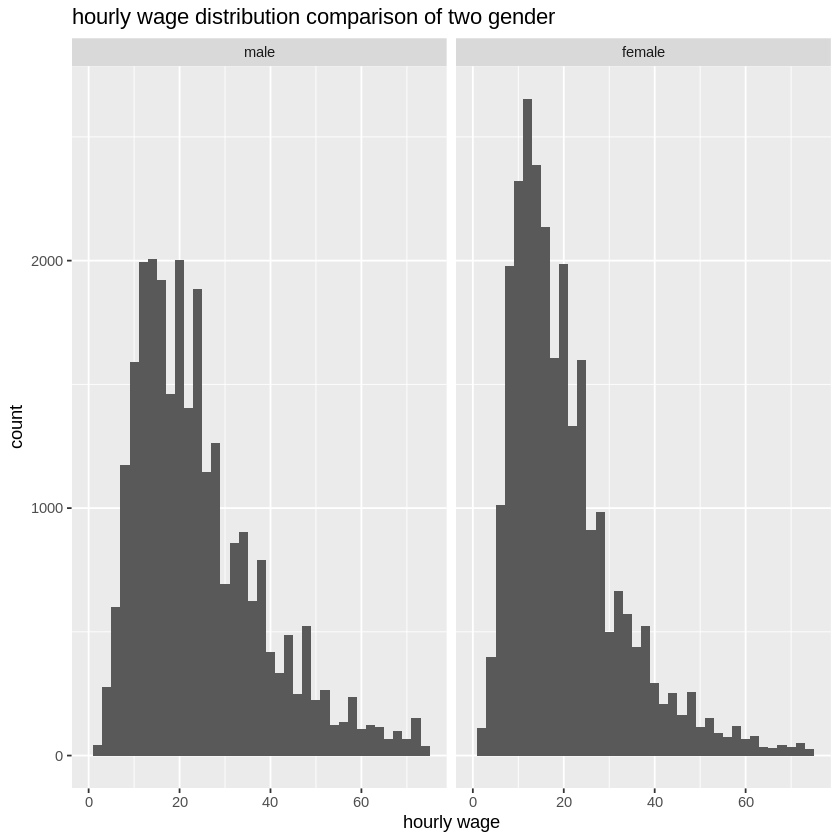

In [20]:
hrwage_plot <- pay_data%>%ggplot() +
  geom_histogram(aes(x = hrwage), binwidth = 2) +
  facet_wrap(~ sex) + xlim(0, 75) + xlab("hourly wage") + ggtitle("hourly wage distribution comparison of two gender")
hrwage_plot

In [54]:
avg_wage <- pay_data %>%
    group_by(industry,sex) %>% 
    summarise(avg_wage = mean(hrwage))
head(avg_wage)

`summarise()` has grouped output by 'industry'. You can override using the
`.groups` argument.


industry,sex,avg_wage
<chr>,<fct>,<dbl>
Agriculture,male,15.75883
Agriculture,female,17.57063
Communications,male,34.62143
Communications,female,25.10552
durables,male,28.37269
durables,female,21.79669


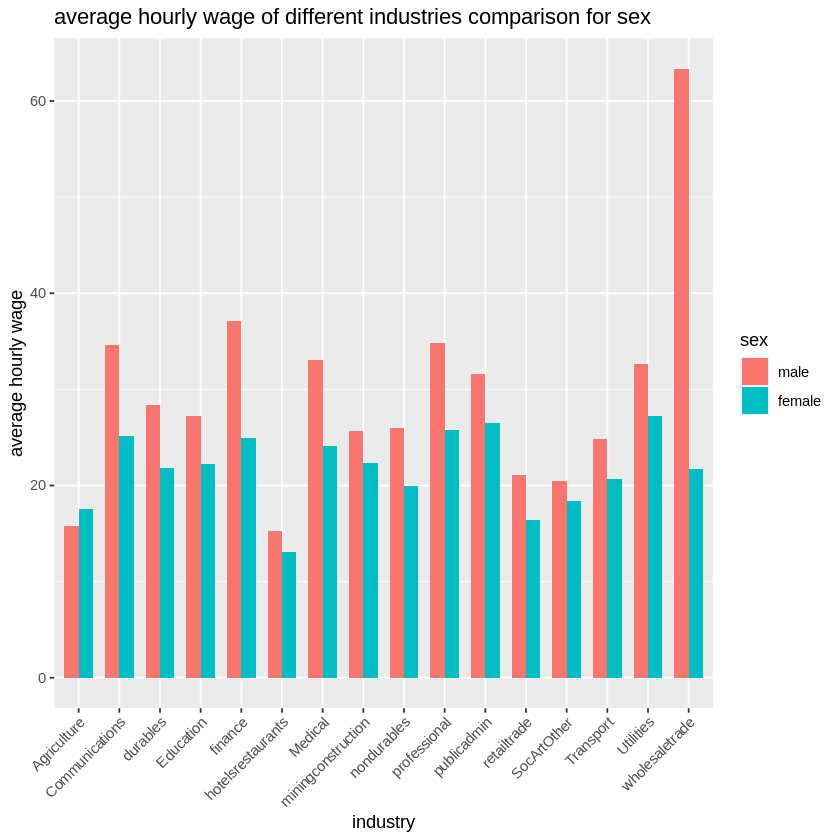

In [53]:
industry_plot <- avg_wage %>% ggplot() +
    geom_bar(aes(x = factor(industry), y = avg_wage, fill = sex), stat = "identity", position = "dodge", width = 0.7) +
    labs(list(x = "x", y = "count",fill = "group")) + 
    theme(axis.text.x = element_text(angle =45, hjust = 1)) +
    xlab("industry") + 
    ylab("average hourly wage") +
    ggtitle("average hourly wage of different industries comparison for sex")
industry_plot

# Methods

## Trustworthiness of Report

This report aims to ensure its trustworthiness by adhering to the following principles and practices:

1) Rigorous Statistical Methods: The report employs well-established statistical methods, such as hypothesis testing and confidence interval construction, to analyze gender wage disparities. By using these robust techniques, the analysis aims to provide accurate and reliable estimates of the wage gap.

2) Transparent Data Preprocessing: The report emphasizes transparent data preprocessing, including filtering variables, handling missing data, and addressing outliers. This ensures that the dataset is cleaned and prepared in a manner that minimizes biases and promotes data integrity.

3) Reproducibility: The report ensures reproducibility by providing detailed documentation of the data processing steps and statistical analyses performed. All statistical software code will be included, enabling others to replicate the results and verify the findings.

4) Appropriate Comparison Methods: The report considers both parametric (two-sample t-test) and non-parametric (Wilcoxon rank-sum test) approaches for comparing hourly wages between genders. By evaluating different methods, the report aims to provide a comprehensive and robust assessment of the wage gap.

5) Robustness Checks: The report incorporates bootstrapping and asymptotic methods to validate the results obtained from traditional hypothesis testing and confidence intervals. By comparing the outcomes of these approaches, the analysis seeks to assess the sensitivity and robustness of the conclusions.

## Methods (PLAN)

1. Data Preprocessing:

 - Importing the dataset containing information on demographic and employment-related variables. 
- Filter the dataset to include only relevant variables: sex, race, hourly wage, total income, schooling years, weeks worked, and usual hours worked. 
- Handle missing data and outliers appropriately to ensure data quality. 

2. Hypothesis Testing: 

- Formulate the null hypothesis (H0): There is no significant difference in average hourly wages between male and female workers. 
- Conduct a two-sample t-test to compare the mean hourly wages of male and female workers. 
- Alternatively, perform a non-parametric Wilcoxon rank-sum test to assess wage differences without assuming normality. 

3. Confidence Interval Construction: 

- Calculate a confidence interval for the difference in average hourly wages between genders. 
- Use the standard error of the difference in means to determine the range of plausible values for the population parameter. 

4. Bootstrapping: 

- Apply the bootstrapping method to generate resamples from the dataset with replacement. - Compute the mean hourly wage difference for each resample, creating a bootstrapped distribution of differences. 
- Use the bootstrapped distribution to estimate the variability of the wage gap and construct confidence intervals. 

5. Asymptotics: 

- Utilize asymptotic methods, such as the Central Limit Theorem, to analyze the behavior of sample statistics as sample size increases. 
- Approximate the sampling distribution of the mean hourly wage difference for large sample sizes. 
- Compare the asymptotic results with bootstrapped estimates for validation.

 6. Visualization: 
 
- Create visualizations, such as box plots or density plots, to display the distribution of hourly wages for each gender. 
- Present histograms or bar charts to compare the average hourly wages of male and female workers.

7. Interpretation: 

- Interpret the results of hypothesis tests and confidence intervals to assess the significance of the gender wage gap. 
- Provide insights into the magnitude and direction of the disparity in hourly wages. 
- Discuss the implications of the findings and their relevance to existing literature on gender wage disparities.


## Reflecting on how the final report might play out

1. Expected Findings:
Based on our preliminary analysis and existing literature on gender wage disparities, we expect to find a statistically significant gender wage gap in the United States. Our hypothesis tests and confidence intervals are likely to reveal that female workers earn, on average, lower hourly wages than their male counterparts. Additionally, we anticipate uncovering variations in wage gaps across different racial groups, providing deeper insights into intersectional inequalities.

2. Impact of Findings:
The implications of our findings could be far-reaching. Identifying and quantifying the gender wage gap can serve as a call to action for policymakers, employers, and advocates to address this pressing issue. By highlighting the existence of disparities, our study can contribute to the ongoing efforts towards gender equality in the workforce. Policymakers may use the evidence to design and implement targeted policies aimed at reducing wage gaps and promoting fair pay practices. Employers, on the other hand, might be motivated to reassess their compensation structures and ensure equitable pay for all employees, irrespective of gender or race.

3. Future Questions:
The findings from our study could lead to several future research questions and avenues of inquiry:

   a) Factors Driving Wage Disparities: We might explore the underlying factors contributing to gender wage gaps, such as occupational segregation, negotiation skills, and work-life balance challenges. Understanding these factors can inform the design of more effective interventions.

   b) Longitudinal Analysis: A longitudinal analysis could be conducted to assess whether the wage gap changes over time and identify trends in wage disparities.

   c) Intersectional Analysis: We could delve deeper into the intersectionality of gender and race to understand how the wage gap varies for different racial and ethnic groups.

   d) Impact of Policy Interventions: Analyzing the impact of specific policy interventions aimed at reducing wage disparities could provide valuable insights into the effectiveness of various strategies.

   e) Wage Gap in Different Industries: Investigating the wage gap across various industries and occupations could help identify sectors with more significant disparities and guide targeted interventions.

   f) Non-Monetary Factors: Exploring non-monetary factors, such as access to career advancement opportunities and mentorship, could shed light on additional aspects of workplace inequality.

Overall, our final report is likely to contribute to the growing body of evidence on gender wage disparities, empowering stakeholders to make informed decisions to create a more inclusive and equitable workforce. The study's comprehensive approach, rigorous statistical methods, and insightful findings are expected to stimulate further research and discussions on gender equality in the labor market.

# References

1) Deep B. (2021). Gender Pay Gap Dataset. Kaggle. Retrieved from: https://www.kaggle.com/code/deepbdoshi/gender-pay-gap

2) Blau, F. D., & Kahn, L. M. (2017). The Gender Wage Gap: Extent, Trends, and Explanations. Journal of Economic Literature, 55(3), 789–865. http://www.jstor.org/stable/26303306

3) Pew Research Center. (March 1, 2023). Gender Pay Gap Facts. Pew Research Center. Retrieved from https://www.pewresearch.org/short-reads/2023/03/01/gender-pay-gap-facts/